<a href="https://colab.research.google.com/github/Angeal13/Bank_Personal_Loan/blob/main/Nov_12_Bank_Personal_Loan_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

##Imports

In [ ]:
!pip install pgeocode

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy import stats
from sklearn import metrics
import pgeocode
from sklearn.metrics import *

In [ ]:
Nomit=pgeocode.Nominatim('us')
data=pd.read_csv('/content/drive/MyDrive/Work Assignment /Nov 12/Bank_Personal_Loan_Modelling.csv')
data_zip_code=pd.read_excel('/content/drive/MyDrive/Work Assignment /Nov 12/uszips.xlsx')

##Types,Summary,Shape,Nulls and Incorrect Inputations

In [ ]:
#Types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
#Statistical Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.shape

(5000, 14)

In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#EDA: Study the data distribution in each attribute and target variable, share your findings 

In [ ]:
#Unique Number of distributions Per Column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
data.shape

(5000, 14)

In [ ]:
data_mod=data.drop(['ID','Experience'],axis=1)

In [ ]:
#People with 0 Mortgage
count=0
for i in data_mod['Mortgage']:
    
  if i==0:
    count+=1
count

3462

In [ ]:
count=0
for i in data_mod['CCAvg']:
  if i==0:
    count+=1
count

106

In [ ]:
data_mod.columns
B=['ZIP Code', 'Family',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

##PairPlots

<Figure size 1000x1000 with 0 Axes>

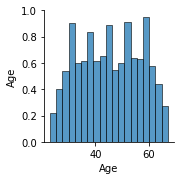

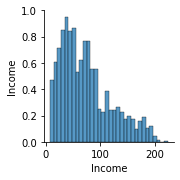

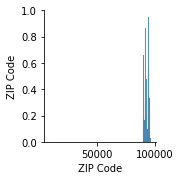

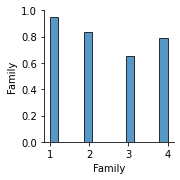

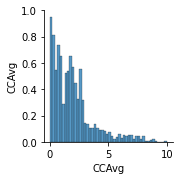

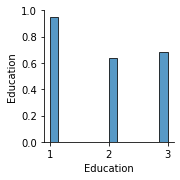

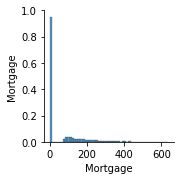

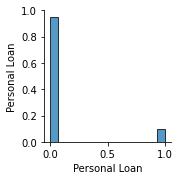

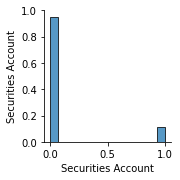

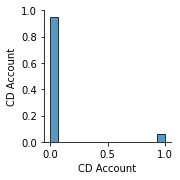

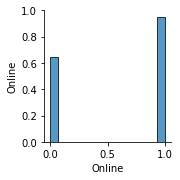

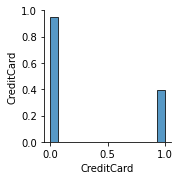

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
for i in range(len(data_mod.columns)):
  
  #plt.figure(figsize=(10,10),dpi=100)
  sns.pairplot(data_mod,x_vars=data_mod.columns[i],y_vars=data_mod.columns[i])

In [ ]:
data_mod.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

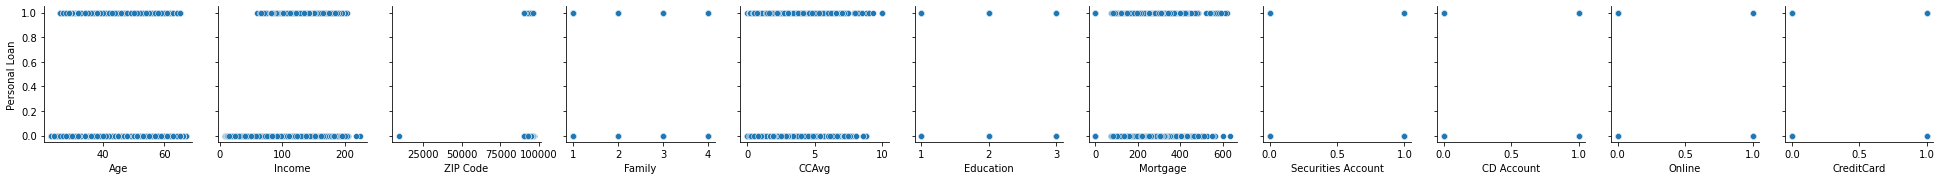

In [ ]:
sns.pairplot(data_mod,
             x_vars=['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard'],
             y_vars=['Personal Loan'])

In [ ]:
data_mod=data_mod.replace({'Education':{1:'Undergrad',2:'Graduate',3:'Advance'}})

In [ ]:
data_mod.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [ ]:
data_zip_code.columns

Index(['zip', 'city', 'state_name', 'zcta', 'parent_zcta', 'population',
       'density', 'county_name', 'county_names_all', 'county_fips_all',
       'imprecise', 'military', 'timezone'],
      dtype='object')

In [ ]:
data_mod.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
data_mod.describe()

,Age,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data_mod.isnull().sum()

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
len(data_mod)

5000

In [ ]:
county=[]
for i in data['ZIP Code']:
  county.append(Nomit.query_postal_code(i).county_name)
len(county)

5000

In [ ]:
data_mod['County Name']=county
data_mod.nunique().T

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
County Name            38
dtype: int64

In [ ]:
data_mod=data_mod.drop('ZIP Code',axis=1)


In [ ]:
data_mod.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County Name
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0,Alameda
3,35,100,1,2.7,Graduate,0,0,0,0,0,0,City and County of San Francisco
4,35,45,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles


In [ ]:
def categorical_counts(column):
  plt.figure(figsize=(10,10),dpi=100,)
  sns.countplot(data_mod[column])
  plt.xticks(rotation=90)
  plt.title('Counts per {}'.format(column))

In [ ]:
data_mod.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'County Name'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

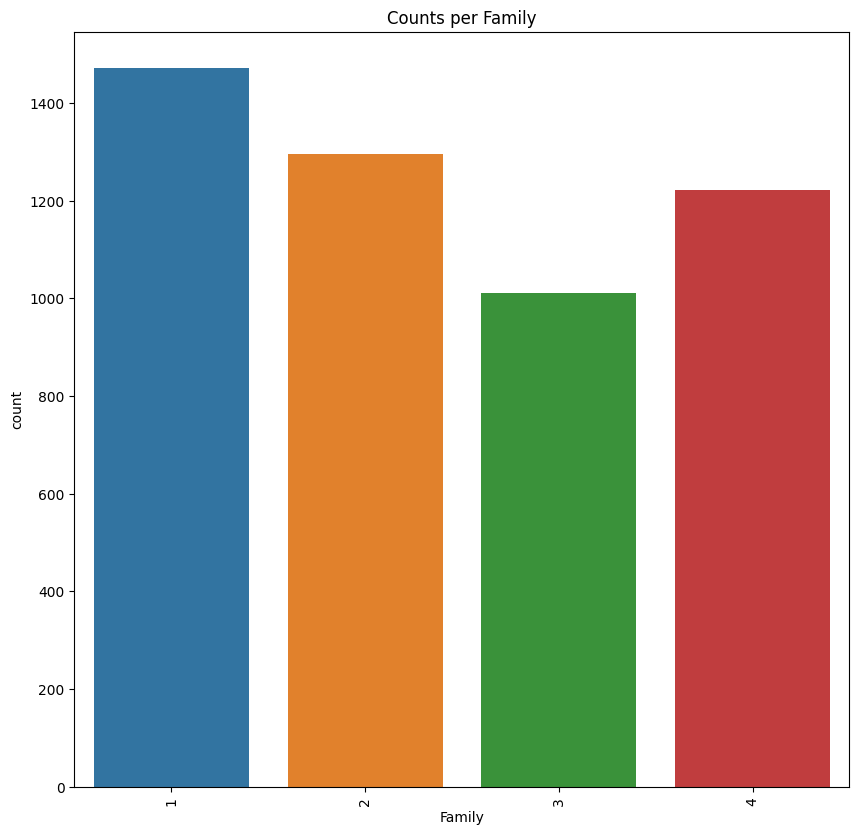

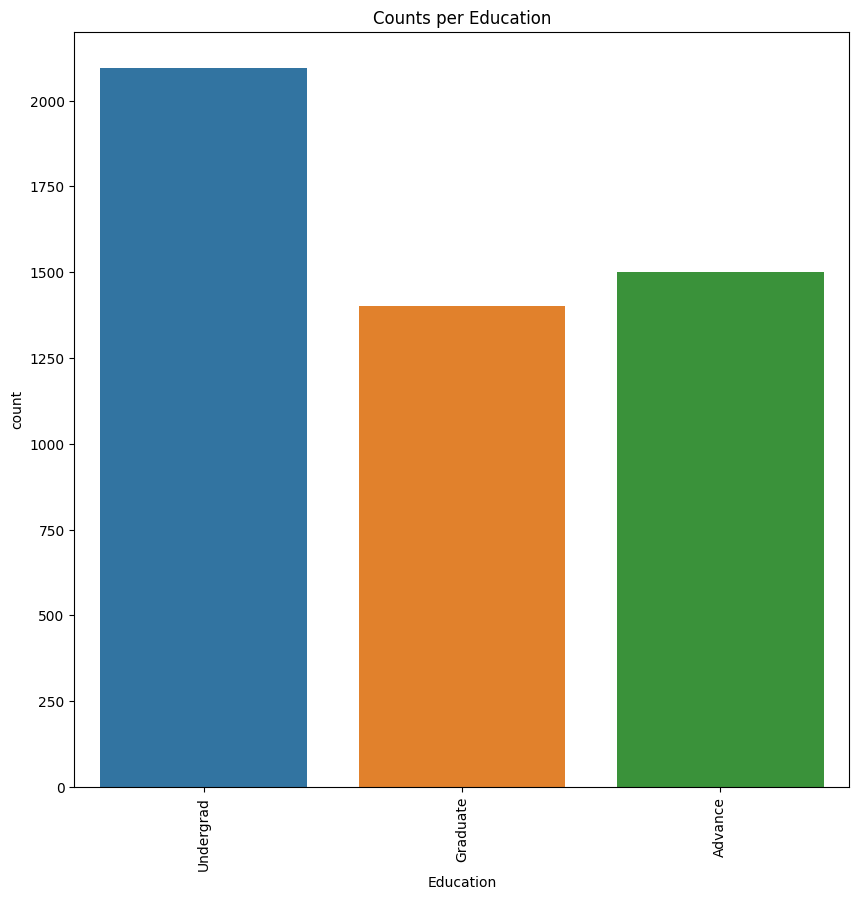

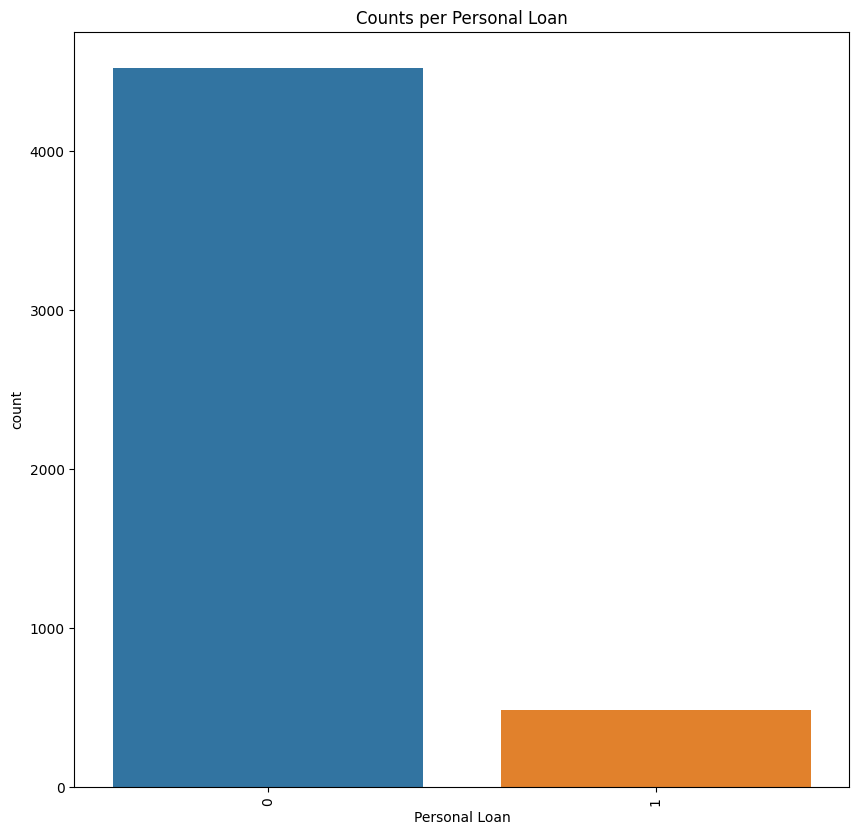

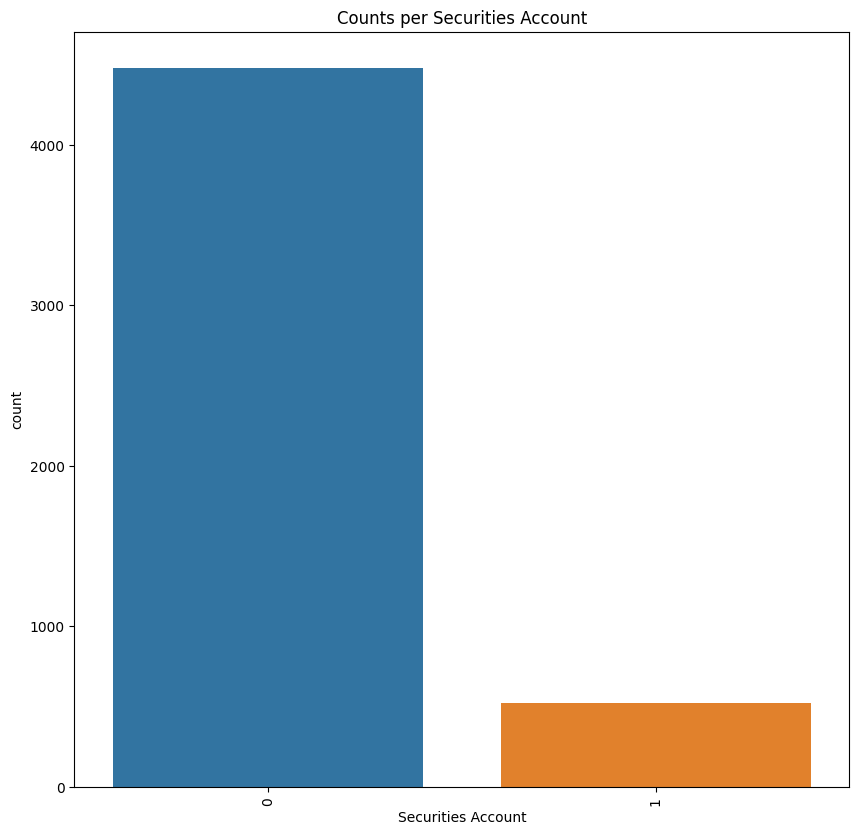

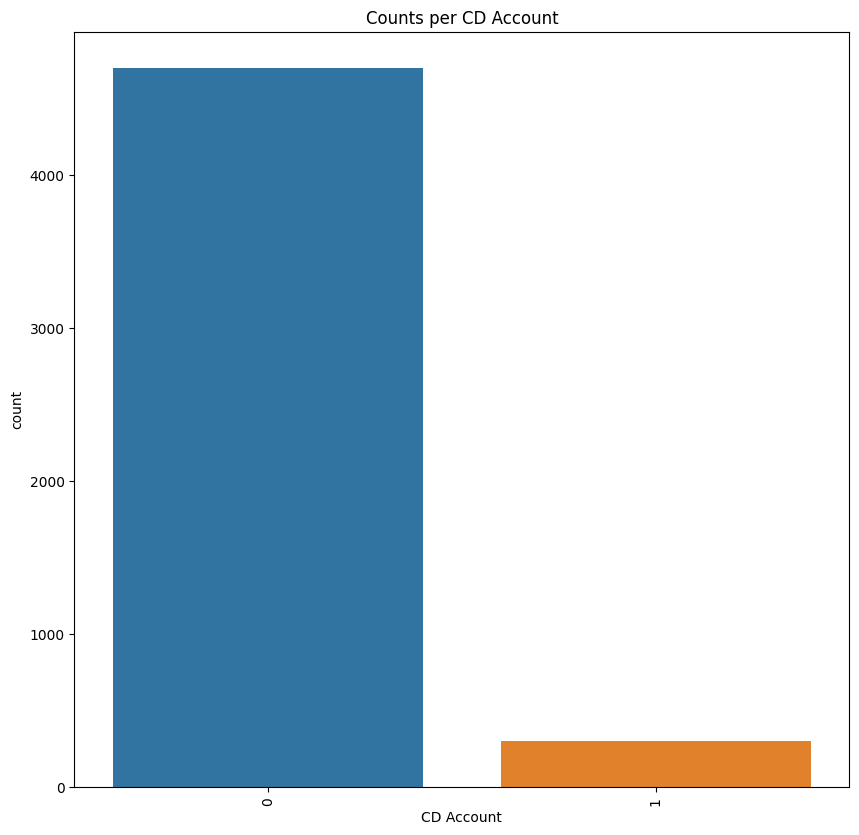

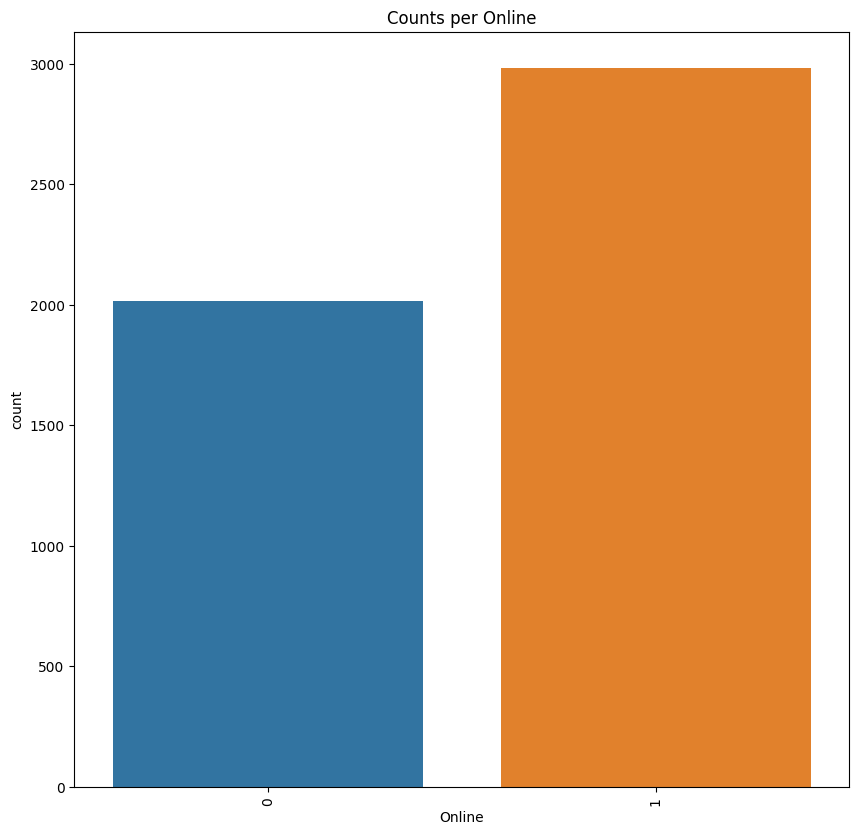

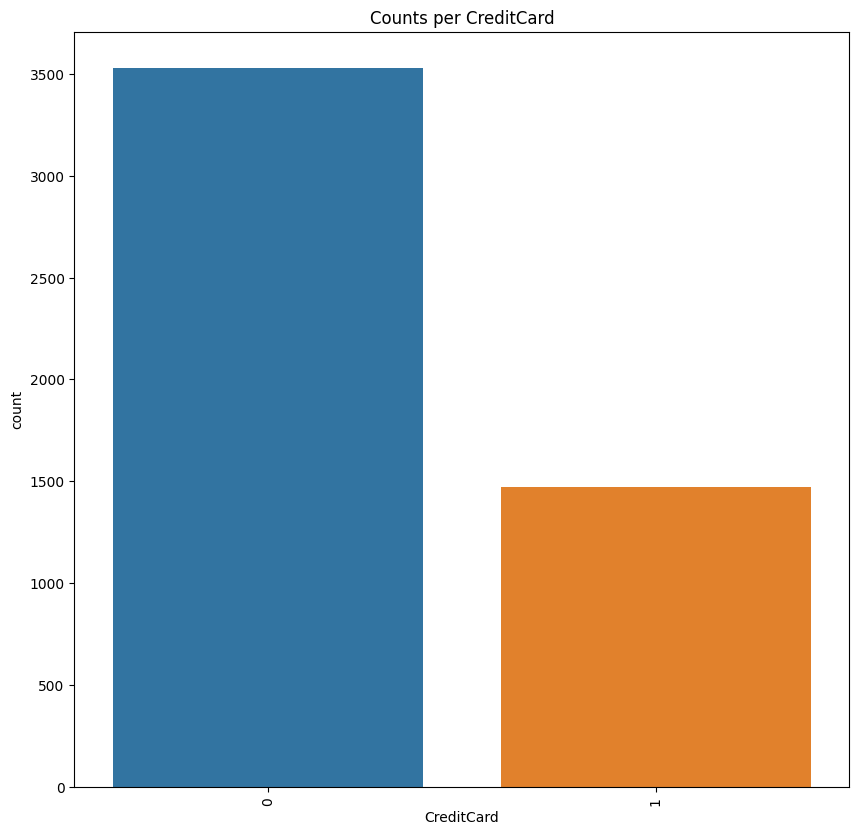

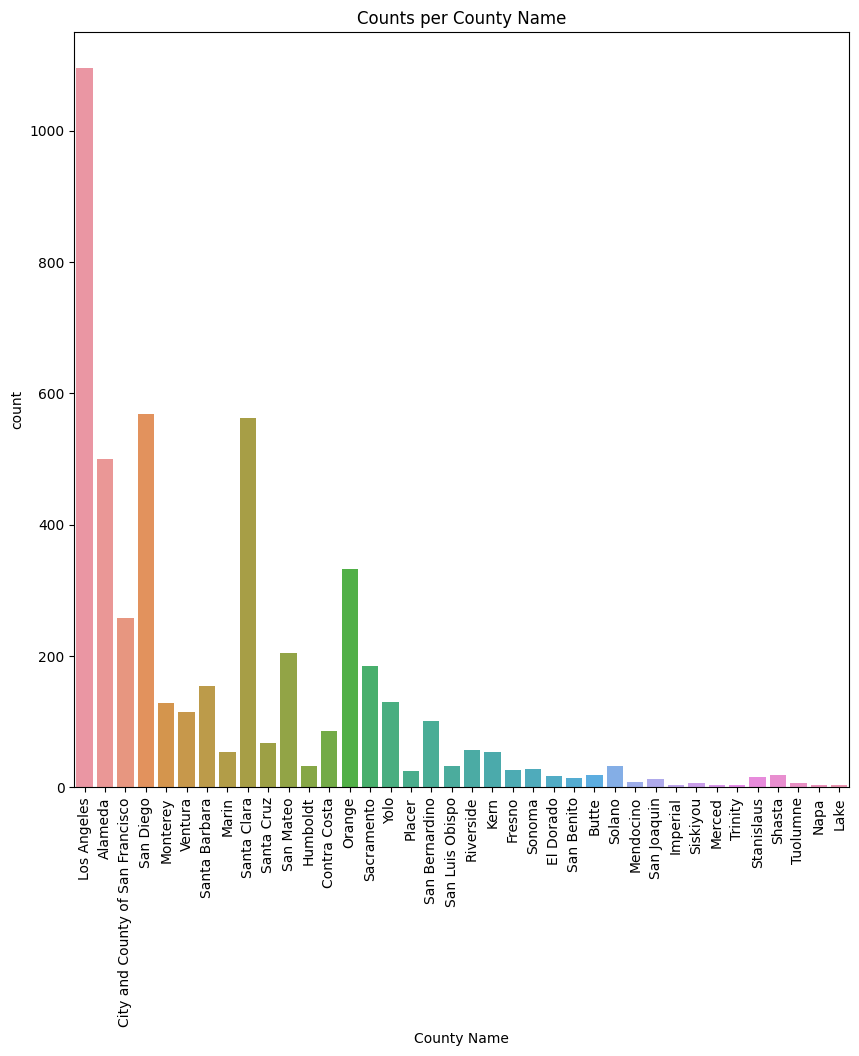

In [ ]:
B=['Family','Education','Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'County Name']
for i in B:
  categorical_counts(i)

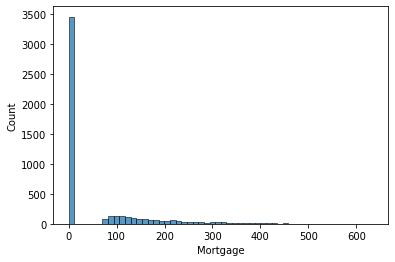

In [ ]:
sns.histplot(data['Mortgage'])

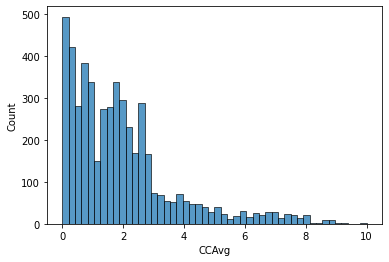

In [ ]:
sns.histplot(data['CCAvg'])

#Build The ML

##Split the  data into X,Y

In [ ]:
X=data_mod.drop('Personal Loan',axis=1)
y=data_mod['Personal Loan']

In [ ]:
X.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [ ]:
def get_metrics(y_test,y_pred):
  metrics={}
  metrics={
      'accuracy':[accuracy_score(y_test,y_pred)],
      'precision':[precision_score(y_test,y_pred)],
      'recall':[recall_score(y_test,y_pred)],
      'f_1_score':[f1_score(y_test,y_pred)],
      'ROC_AUC':[roc_auc_score(y_test,y_pred)],

  }
  metrics_df=pd.DataFrame.from_dict(metrics,orient='index')
  return metrics_df

In [ ]:
def get_confuision_matrix(y_test,y_pred):
  cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
  df_cm=pd.DataFrame(cm,index=[i for i in ['0','1']],
                   columns=[i for i in ['Predict0','Predict1']])
  df_cm
  plt.figure(figsize=(8,8))
  sns.heatmap(df_cm,annot=True)


##Model 0: No Bins

In [ ]:
X_1=pd.get_dummies(X)

In [ ]:
X.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles


In [ ]:
X_1_train,X_1_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=1)

In [ ]:
#model
model_1=LogisticRegression(solver='liblinear')

In [ ]:
model_1.fit(X_1_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_1_pred=model_1.predict(X_1_test)

In [ ]:
model_1_metrics=get_metrics(y_test,y_1_pred)
model_1_metrics

,0
accuracy,0.952667
precision,0.875000
recall,0.610738
f_1_score,0.719368
ROC_AUC,0.800558


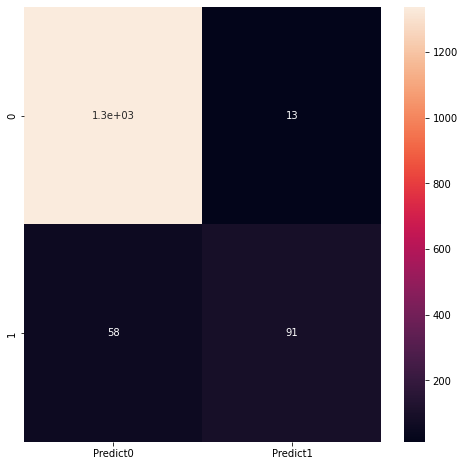

In [ ]:
model_1_CM=get_confuision_matrix(y_test,y_1_pred)

##Model 2: Classifying by Age Group Only

In [ ]:
X.describe()

,Age,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
Bins=[min(X['Age'])-1,35,45,55,max(X['Age']+1)]
Bins

[22, 35, 45, 55, 68]

In [ ]:
X_2=X
X_2['Age Group']=pd.cut(X['Age'],bins=Bins,labels=['Y','MY','MO','O'])
X_2

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name,Age Group
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles,Y
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles,MY
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda,MY
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco,Y
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,Advance,0,0,0,1,0,Orange,Y
4996,30,15,4,0.4,Undergrad,85,0,0,1,0,San Diego,Y
4997,63,24,2,0.3,Advance,0,0,0,0,0,Ventura,O
4998,65,49,3,0.5,Graduate,0,0,0,1,0,Los Angeles,O


In [ ]:
X_2=X_2.drop('Age',axis=1)
X_2

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name,Age Group
0,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles,Y
1,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles,MY
2,11,1,1.0,Undergrad,0,0,0,0,0,Alameda,MY
3,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco,Y
4,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles,Y
...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,Advance,0,0,0,1,0,Orange,Y
4996,15,4,0.4,Undergrad,85,0,0,1,0,San Diego,Y
4997,24,2,0.3,Advance,0,0,0,0,0,Ventura,O
4998,49,3,0.5,Graduate,0,0,0,1,0,Los Angeles,O


In [ ]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name,Age Group
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles,Y
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles,MY
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda,MY
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco,Y
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,Advance,0,0,0,1,0,Orange,Y
4996,30,15,4,0.4,Undergrad,85,0,0,1,0,San Diego,Y
4997,63,24,2,0.3,Advance,0,0,0,0,0,Ventura,O
4998,65,49,3,0.5,Graduate,0,0,0,1,0,Los Angeles,O


In [ ]:
X_2=pd.get_dummies(X_2)

In [ ]:
X_2_train,X_2_test,y_train,y_test=train_test_split(X_2,y,test_size=0.3,random_state=1)

In [ ]:
X_2

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advance,Education_Graduate,Education_Undergrad,County Name_Alameda,County Name_Butte,County Name_City and County of San Francisco,County Name_Contra Costa,County Name_El Dorado,County Name_Fresno,County Name_Humboldt,County Name_Imperial,County Name_Kern,County Name_Lake,County Name_Los Angeles,County Name_Marin,County Name_Mendocino,County Name_Merced,County Name_Monterey,County Name_Napa,County Name_Orange,County Name_Placer,County Name_Riverside,County Name_Sacramento,County Name_San Benito,County Name_San Bernardino,County Name_San Diego,County Name_San Joaquin,County Name_San Luis Obispo,County Name_San Mateo,County Name_Santa Barbara,County Name_Santa Clara,County Name_Santa Cruz,County Name_Shasta,County Name_Siskiyou,County Name_Solano,County Name_Sonoma,County Name_Stanislaus,County Name_Trinity,County Name_Tuolumne,County Name_Ventura,County Name_Yolo,Age Group_Y,Age Group_MY,Age Group_MO,Age Group_O
0,49,4,1.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,34,3,1.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,11,1,1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,100,1,2.7,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,45,4,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4996,15,4,0.4,85,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4997,24,2,0.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,49,3,0.5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
model_2=LogisticRegression(solver='liblinear')
model_2.fit(X_2_train,y_train)
y_2_pred=model_2.predict(X_2_test)

In [ ]:
model_2_metrics=get_metrics(y_test,y_2_pred)
model_2_metrics

,0
accuracy,0.954000
precision,0.900000
recall,0.604027
f_1_score,0.722892
ROC_AUC,0.798312


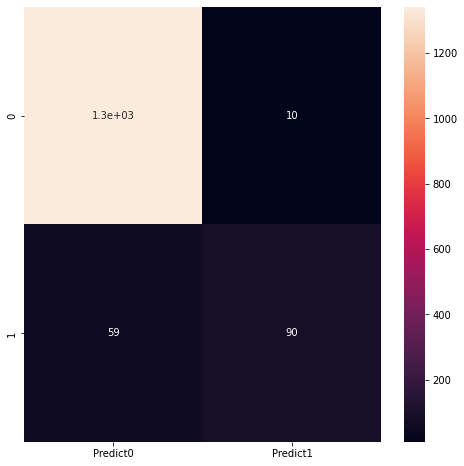

In [ ]:
model_2_CM=get_confuision_matrix(y_test,y_2_pred)

##Model 3: Classifying by Income Only

In [ ]:
X=X.drop('Age Group',axis=1)
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,Advance,0,0,0,1,0,Orange
4996,30,15,4,0.4,Undergrad,85,0,0,1,0,San Diego
4997,63,24,2,0.3,Advance,0,0,0,0,0,Ventura
4998,65,49,3,0.5,Graduate,0,0,0,1,0,Los Angeles


In [ ]:
X_3=X
X_3.describe()

,Age,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
Bins=[min(X_3['Mortgage'])-1,100,200,300,400,500,600,max(X_3['Mortgage'])]

In [ ]:
X_3['Mortgage Group']=pd.cut(X_3['Mortgage'],bins=Bins)

In [ ]:
X_3

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,County Name,Mortgage Group
0,25,49,4,1.6,Undergrad,0,1,0,0,0,Los Angeles,"(-1, 100]"
1,45,34,3,1.5,Undergrad,0,1,0,0,0,Los Angeles,"(-1, 100]"
2,39,11,1,1.0,Undergrad,0,0,0,0,0,Alameda,"(-1, 100]"
3,35,100,1,2.7,Graduate,0,0,0,0,0,City and County of San Francisco,"(-1, 100]"
4,35,45,4,1.0,Graduate,0,0,0,0,1,Los Angeles,"(-1, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,Advance,0,0,0,1,0,Orange,"(-1, 100]"
4996,30,15,4,0.4,Undergrad,85,0,0,1,0,San Diego,"(-1, 100]"
4997,63,24,2,0.3,Advance,0,0,0,0,0,Ventura,"(-1, 100]"
4998,65,49,3,0.5,Graduate,0,0,0,1,0,Los Angeles,"(-1, 100]"


In [ ]:
X_3=X_3.drop('Mortgage',axis=1)

In [ ]:
X_3=pd.get_dummies(X_3)

In [ ]:
X_3_train,X_3_test,y_train,y_test=train_test_split(X_3,y,test_size=0.3,random_state=1)

In [ ]:
#Modeling
model_3=LogisticRegression(solver='liblinear')
model_3.fit(X_3_train,y_train)
y_3_pred=model_3.predict(X_3_test)

In [ ]:
model_3_metrics=get_metrics(y_test,y_3_pred)
model_3_metrics

,0
accuracy,0.954667
precision,0.885714
recall,0.624161
f_1_score,0.732283
ROC_AUC,0.807639


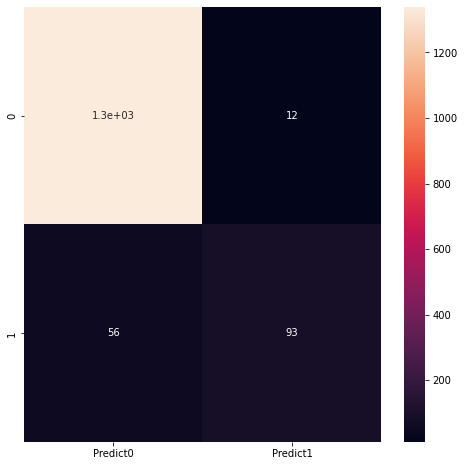

In [ ]:
model_3_CM=get_confuision_matrix(y_test,y_3_pred)

##Model 4: Classify Income to Mortgage

In [ ]:
X_3

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Advance,Education_Graduate,Education_Undergrad,County Name_Alameda,County Name_Butte,County Name_City and County of San Francisco,County Name_Contra Costa,County Name_El Dorado,County Name_Fresno,County Name_Humboldt,County Name_Imperial,County Name_Kern,County Name_Lake,County Name_Los Angeles,County Name_Marin,County Name_Mendocino,County Name_Merced,County Name_Monterey,County Name_Napa,County Name_Orange,County Name_Placer,County Name_Riverside,County Name_Sacramento,County Name_San Benito,County Name_San Bernardino,County Name_San Diego,County Name_San Joaquin,County Name_San Luis Obispo,County Name_San Mateo,County Name_Santa Barbara,County Name_Santa Clara,County Name_Santa Cruz,County Name_Shasta,County Name_Siskiyou,County Name_Solano,County Name_Sonoma,County Name_Stanislaus,County Name_Trinity,County Name_Tuolumne,County Name_Ventura,County Name_Yolo,"Mortgage Group_(-1, 100]","Mortgage Group_(100, 200]","Mortgage Group_(200, 300]","Mortgage Group_(300, 400]","Mortgage Group_(400, 500]","Mortgage Group_(500, 600]","Mortgage Group_(600, 635]"
0,25,49,4,1.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,45,34,3,1.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,39,11,1,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,35,100,1,2.7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,35,45,4,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4996,30,15,4,0.4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4997,63,24,2,0.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4998,65,49,3,0.5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_3['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [ ]:
Bins=[min(X_3['Income'])-1,39,64,98,max(X_3['Income'])]

In [ ]:
X_4=X_3
X_4['Income Level']=pd.cut(X_3['Income'],bins=Bins,labels=['Low','MidLow','MidUp','Up'])

In [ ]:
X_4

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Advance,Education_Graduate,Education_Undergrad,County Name_Alameda,County Name_Butte,County Name_City and County of San Francisco,County Name_Contra Costa,County Name_El Dorado,County Name_Fresno,County Name_Humboldt,County Name_Imperial,County Name_Kern,County Name_Lake,County Name_Los Angeles,County Name_Marin,County Name_Mendocino,County Name_Merced,County Name_Monterey,County Name_Napa,County Name_Orange,County Name_Placer,County Name_Riverside,County Name_Sacramento,County Name_San Benito,County Name_San Bernardino,County Name_San Diego,County Name_San Joaquin,County Name_San Luis Obispo,County Name_San Mateo,County Name_Santa Barbara,County Name_Santa Clara,County Name_Santa Cruz,County Name_Shasta,County Name_Siskiyou,County Name_Solano,County Name_Sonoma,County Name_Stanislaus,County Name_Trinity,County Name_Tuolumne,County Name_Ventura,County Name_Yolo,"Mortgage Group_(-1, 100]","Mortgage Group_(100, 200]","Mortgage Group_(200, 300]","Mortgage Group_(300, 400]","Mortgage Group_(400, 500]","Mortgage Group_(500, 600]","Mortgage Group_(600, 635]",Income Level
0,25,49,4,1.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,MidLow
1,45,34,3,1.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Low
2,39,11,1,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Low
3,35,100,1,2.7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Up
4,35,45,4,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,MidLow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,MidLow
4996,30,15,4,0.4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Low
4997,63,24,2,0.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Low
4998,65,49,3,0.5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,MidLow


In [ ]:
X_4=X_4.drop('Income',axis=1)

In [ ]:
X_4=pd.get_dummies(X_4)
X_4

,Age,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Advance,Education_Graduate,Education_Undergrad,County Name_Alameda,County Name_Butte,County Name_City and County of San Francisco,County Name_Contra Costa,County Name_El Dorado,County Name_Fresno,County Name_Humboldt,County Name_Imperial,County Name_Kern,County Name_Lake,County Name_Los Angeles,County Name_Marin,County Name_Mendocino,County Name_Merced,County Name_Monterey,County Name_Napa,County Name_Orange,County Name_Placer,County Name_Riverside,County Name_Sacramento,County Name_San Benito,County Name_San Bernardino,County Name_San Diego,County Name_San Joaquin,County Name_San Luis Obispo,County Name_San Mateo,County Name_Santa Barbara,County Name_Santa Clara,County Name_Santa Cruz,County Name_Shasta,County Name_Siskiyou,County Name_Solano,County Name_Sonoma,County Name_Stanislaus,County Name_Trinity,County Name_Tuolumne,County Name_Ventura,County Name_Yolo,"Mortgage Group_(-1, 100]","Mortgage Group_(100, 200]","Mortgage Group_(200, 300]","Mortgage Group_(300, 400]","Mortgage Group_(400, 500]","Mortgage Group_(500, 600]","Mortgage Group_(600, 635]",Income Level_Low,Income Level_MidLow,Income Level_MidUp,Income Level_Up
0,25,4,1.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,45,3,1.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,39,1,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,35,1,2.7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,35,4,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,1,1.9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4996,30,4,0.4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4997,63,2,0.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4998,65,3,0.5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_4_train,X_4_test,y_train,y_test=train_test_split(X_4,y,test_size=0.3,random_state=1)

In [ ]:
model_4=LogisticRegression(solver='liblinear')
model_4.fit(X_4_train,y_train)
y_4_pred=model_4.predict(X_4_test)

In [ ]:
model_4_metrics=get_metrics(y_test,y_4_pred)
model_4_metrics

,0
accuracy,0.948667
precision,0.815789
recall,0.624161
f_1_score,0.707224
ROC_AUC,0.804309


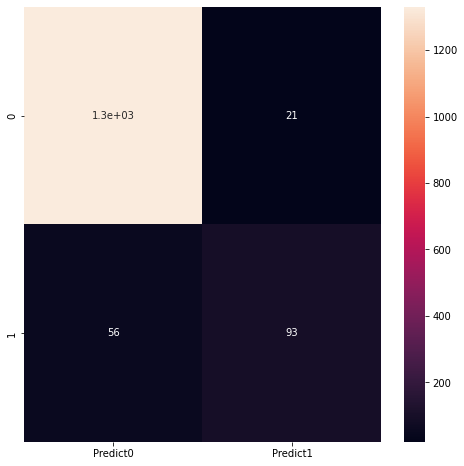

In [ ]:
mode_4_cm=get_confuision_matrix(y_test,y_4_pred)

##Model 5: Classifying CCAvg

In [ ]:
X_5=X_4
X_5['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [ ]:
Bins=[-1,0.75,1.5,1.75,2.5,10.0]
X_5['CC Class']=pd.cut(X['CCAvg'],bins=Bins)
X_5=X_5.drop('CCAvg',axis=1)
X_5=pd.get_dummies(X_5)

In [ ]:
X_5_train,X_5_test,y_train,y_test=train_test_split(X_5,y,test_size=0.3,random_state=1)

In [ ]:
model_5=LogisticRegression(solver='liblinear')
model_5.fit(X_5_train,y_train)
y_5_pred=model_5.predict(X_5_test)

In [ ]:
model_5_metrics=get_metrics(y_test,y_5_pred)
model_5_metrics

,0
accuracy,0.958000
precision,0.883929
recall,0.664430
f_1_score,0.758621
ROC_AUC,0.827404


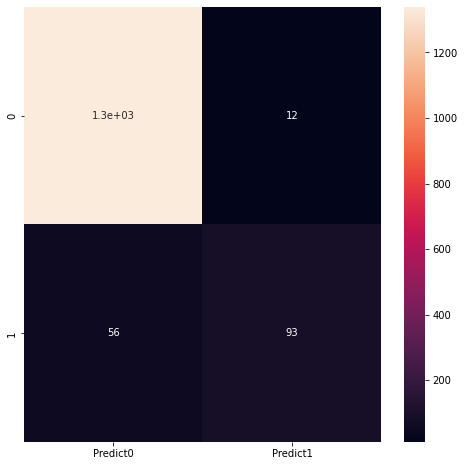

In [ ]:
get_confuision_matrix(y_test,y_3_pred)

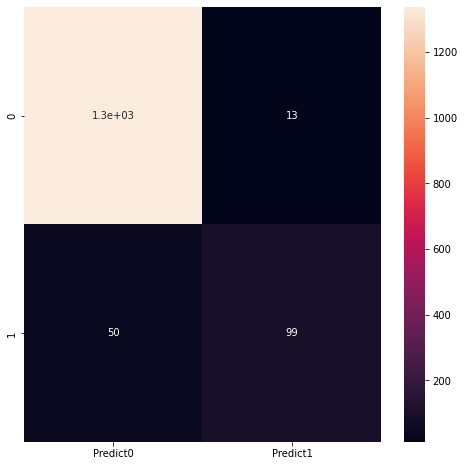

In [ ]:
get_confuision_matrix(y_test,y_5_pred)

In [ ]:
 X_5.head()

,Age,Family,Securities Account,CD Account,Online,CreditCard,Education_Advance,Education_Graduate,Education_Undergrad,County Name_Alameda,County Name_Butte,County Name_City and County of San Francisco,County Name_Contra Costa,County Name_El Dorado,County Name_Fresno,County Name_Humboldt,County Name_Imperial,County Name_Kern,County Name_Lake,County Name_Los Angeles,County Name_Marin,County Name_Mendocino,County Name_Merced,County Name_Monterey,County Name_Napa,County Name_Orange,County Name_Placer,County Name_Riverside,County Name_Sacramento,County Name_San Benito,County Name_San Bernardino,County Name_San Diego,County Name_San Joaquin,County Name_San Luis Obispo,County Name_San Mateo,County Name_Santa Barbara,County Name_Santa Clara,County Name_Santa Cruz,County Name_Shasta,County Name_Siskiyou,County Name_Solano,County Name_Sonoma,County Name_Stanislaus,County Name_Trinity,County Name_Tuolumne,County Name_Ventura,County Name_Yolo,"Mortgage Group_(-1, 100]","Mortgage Group_(100, 200]","Mortgage Group_(200, 300]","Mortgage Group_(300, 400]","Mortgage Group_(400, 500]","Mortgage Group_(500, 600]","Mortgage Group_(600, 635]",Income Level_Low,Income Level_MidLow,Income Level_MidUp,Income Level_Up,"CC Class_(-1.0, 0.75]","CC Class_(0.75, 1.5]","CC Class_(1.5, 1.75]","CC Class_(1.75, 2.5]","CC Class_(2.5, 10.0]"
0,25,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,45,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,39,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,35,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
roc_auc_score(y_test,y_5_pred)

0.8274035141754307

In [ ]:
y_test

2764    0
4767    0
3814    0
3499    0
2735    0
       ..
4140    0
3969    0
2535    0
1361    0
1458    0
Name: Personal Loan, Length: 1500, dtype: int64

# Best Model Yet was Model 5

Feature Importance

In [ ]:
def get_coefs(model,X):
  B=[]
  C=[]
  for idx,col_name in enumerate(X):
    B.append(abs(model.coef_[0][idx]))
    C.append(col_name)
  coefs_dict={
      'Column Name':C,
      'Coeficient': B
  }
  df_coef=pd.DataFrame.from_dict(coefs_dict)
  return df_coef



In [ ]:
df_coefs=get_coefs(model_5,X.columns)
df_coefs

,Column Name,Coeficient
0,Age,0.005598
1,Income,0.667742
2,Family,1.070096
3,CCAvg,3.164463
4,Education,0.513168
5,Mortgage,1.100841
6,Securities Account,0.108427
7,CD Account,0.142364
8,Online,2.920155
9,CreditCard,0.370420


In [ ]:
def get_coefs_polt(df_coefs):
  plt.figure(figsize=(10,10),dpi=100)
  df_coefs.plot(x='Column Name',y='Coeficient',kind='barh')
  

<Figure size 1000x1000 with 0 Axes>

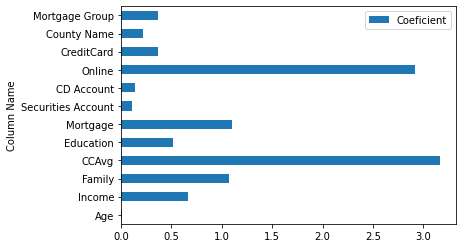

In [ ]:
get_coefs_polt(df_coefs)

Probability 

In [ ]:
def def_prob_maker(y_test,x_test,model):
  z=pd.DataFrame()
  z['y_true']=y_test.values
  z['Probability of output 0']=model.predict_proba(x_test)[:,0]
  z['Probability of output 1']=model.predict_proba(x_test)[:,1]
  z['predicte']=model.predict(x_test)
  return z


In [ ]:

prob_maker=def_prob_maker(y_test,X_5_test,model_5)

In [ ]:
model_5_metrics

,0
accuracy,0.958000
precision,0.883929
recall,0.664430
f_1_score,0.758621
ROC_AUC,0.827404


In [ ]:
r=pd.DataFrame()
r=prob_maker[prob_maker['y_true']!=prob_maker['predicte']]
len(r)

63